### Calculations to accompany Section III of:

## A computational introduction to quantum statistics using harmonically trapped particles

####   Martin Ligare, Department of Physics & Astronomy, Bucknell University

                                              Abstract
   In a 1997 paper Moore and Schroeder argued that the development of student understanding
of thermal physics could be enhanced by computational exercises that highlight the link between
the statistical definition of entropy and the second law of thermodynamics [Am. J. Phys. 65, 26
(1997)]. I introduce examples of similar computational exercises for systems in which the quantum
statistics of identical particles plays an important role. I treat isolated systems of small numbers of
particles confined in a common harmonic potential, and use a computer to enumerate all possible
occupation-number configurations and multiplicities. The examples illustrate the effect of quantum
statistics on the sharing of energy between weakly interacting subsystems, as well as the distribution
of energy within subsystems. The examples also highlight the onset of Bose-Einstein condensation
in small systems.

In section III of the manuscript I investigate a system of 20 identical bosons in a 
three-dimensional trap, and compare it to a system of 20 distinguishable particles. 
(I do not consider interacting sub-systems of particles in this section.) All possible configurations are generated by computerusing the integer-partition method, and the occupation numbers from these configurationsare used in Eqs. (13) or (14), along with degeneracy factors from Eq. (12), to determineappropriate multiplicities for each configuration. Counting the number of all possible statesfor a given system energy givesthe total multiplicity necessary for calculating entropy. Theground state occupation number is calculated from the configurations and multiplicities
using Eq. (11) with $m = 0$. 

The results include graphs of ground-state occupation number vs. temperature, 
and energy per particle vs. temperature.  The hints of a phase transition can be  
temperature in the the ground-state occupation vs. temperature.  This isn't true 
of the graph of ground-state occupation vs. energy; energy and temperature are 
<b>not</b> proportional at low energy/temperature.


In [4]:
import numpy as np
from sympy.utilities import iterables
from scipy import special

import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
# Following is an Ipython magic command that puts figures in notebook.
%matplotlib notebook
        
# M.L. modifications of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic') 
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot parameters for new size

In [6]:
def mult_B(npa):
    '''Calculate multiplicity for bosons in 3D trap with occupation-
    number configuration in numpy array npa.  See Eq. (13).'''
    m = npa[0]
    dm = (m+1)*(m+2)/2
    nm = npa[1]   # NOTE: broadcasting over configuration
    a = special.binom(nm + dm -1, nm)
    return np.prod(a)

def mult_D(npa):
    '''Calculate multiplicity for distinguishable particle in 3D trap 
    with occupation-number configuration given in numpy array npa.  
    See Eq. (14).'''
    m = npa[0]
    dm = (m+1)*(m+2)/2
    nm = npa[1]
    n0 = n - np.sum(nm)
    a = dm**nm/special.factorial(nm)
    #print(n,dm,nm,n0,a)
    return special.factorial(n)*np.prod(a)/special.factorial(n0)

#### Bosons

In [8]:
n = 20
q_max = 80
pop0_B = np.zeros(q_max+1)
pop0_B[0] = n
s_B = np.zeros(q_max+1)

for q in range(1,q_max+1):
    ex0_B = 0
    omega_B = 0

    for p in iterables.partitions(q,n):
        npa = np.array(list(p.items())).T
        #print(npa)
        omega1 = mult_B(npa)
        ex0_B += omega1*(n - np.sum(npa[1]))
        omega_B += omega1
    
    pop0_B[q] = ex0_B/omega_B
    s_B[q] = np.log(omega_B)
    #print(q)   # progress monitor
    
#print(ex0/omega, np.log(omega))

#### Distinguishable particles

In [9]:
n = 20
q_max = 80
pop0_D = np.zeros(q_max+1)
pop0_D[0] = n
s_D = np.zeros(q_max+1)

for q in range(1,q_max+1):
    ex0_D = 0
    omega_D = 0

    for p in iterables.partitions(q,n):
        npa = np.array(list(p.items())).T
        #print(npa)
        omega1 = mult_D(npa)
        ex0_D += omega1*(n - np.sum(npa[1]))
        omega_D += omega1
        #print(p,omega1)
    
    pop0_D[q] = ex0_D/omega_D
    s_D[q] = np.log(omega_D)
    #print(q)  # progress monitor

#### Entropy

<IPython.core.display.Javascript object>


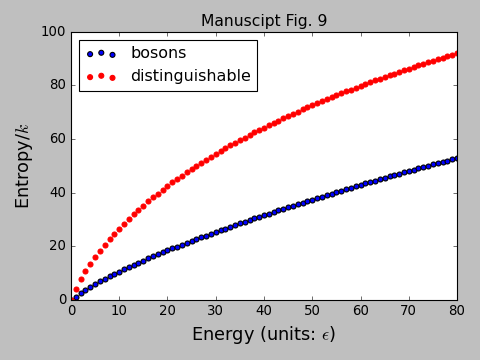

In [16]:
plt.figure()
x = np.linspace(0,q_max, q_max+1)
y1 = s_B
y2 = s_D
plt.xlim(0,80)
plt.ylim(0,100)
plt.scatter(x,y1, label='bosons')
plt.scatter(x, y2, label='distinguishable', color='red')
plt.xlabel('Energy (units: $\epsilon$)')
plt.ylabel('Entropy/$k$')
plt.title('Manuscipt Fig. 9')
plt.legend(loc='upper left');

#### Calculate temperatures

\begin{eqnarray*}
\frac{1}{T_i} &=& \left.\frac{dS}{dq}\right\vert_i \\
            &\simeq& \frac{S_{i+1} - S_{i-1}}{2\epsilon}
\end{eqnarray*}
Solving for $T_i$ gives
$$
T_i = \frac{2\epsilon}{S_{i+1} - S_{i-1}}.
$$

In [10]:
t_B = 2/(s_B[2:] - s_B[:len(s_B)-2])
t_D = 2/(s_D[2:] - s_D[:len(s_D)-2])

<IPython.core.display.Javascript object>


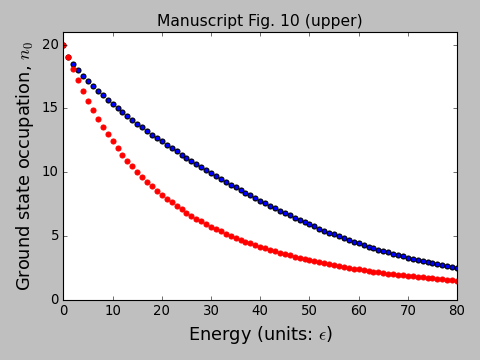

In [17]:
plt.figure()
x = np.linspace(0,q_max, q_max+1)
y1 = pop0_B
y2 = pop0_D
plt.scatter(x, y1)
plt.scatter(x, y2, color='red')
plt.ylim(0,21)
plt.xlim(0,80)
plt.xlabel('Energy (units: $\epsilon$)')
plt.ylabel('Ground state occupation, $n_0$')
plt.title('Manuscript Fig. 10 (upper)');

<IPython.core.display.Javascript object>


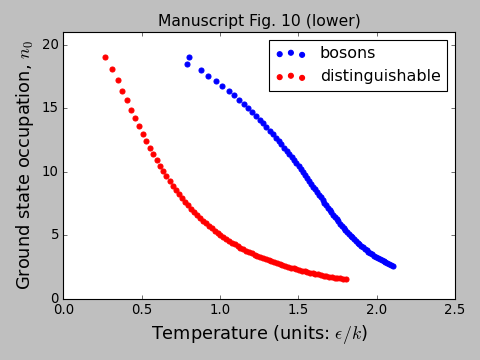

In [23]:
plt.figure()
plt.scatter(t_B,pop0_B[1:len(pop0_B)-1], label='bosons', color='blue')
plt.scatter(t_D,pop0_D[1:len(pop0_B)-1], label='distinguishable', color='red')
plt.xlim(0,2.5)
plt.ylim(0,21);
plt.xlabel('Temperature (units: $\epsilon/k$)')
plt.ylabel('Ground state occupation, $n_0$')
plt.title('Manuscript Fig. 10 (lower)')
plt.legend();
#plt.scatter(x,y)

<IPython.core.display.Javascript object>


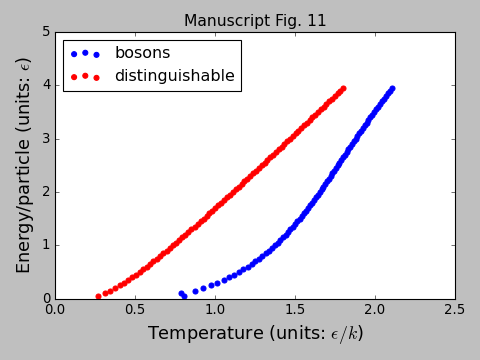

In [26]:
plt.figure()
x1 = t_B
x2 = t_D
y = np.linspace(1,q_max-1, q_max-1)/n
plt.scatter(x1, y,color='blue', label='bosons')
plt.scatter(x2, y, color='red', label='distinguishable')
plt.xlim(0,2.5)
plt.ylim(0,5);
plt.xlabel('Temperature (units: $\epsilon/k$)')
plt.ylabel('Energy/particle (units: $\epsilon$)')
plt.title('Manuscript Fig. 11')
plt.legend(loc='upper left');

#### Example with more bosons: $N_B = 30$

In [139]:
n = 30
q_max = 90
pop0_B = np.zeros(q_max+1)
pop0_B[0] = n
s_B = np.zeros(q_max+1)

for q in range(1,q_max+1):
    ex0_B = 0
    omega_B = 0

    for p in iterables.partitions(q,n):
        npa = np.array(list(p.items())).T
        #print(npa)
        omega1 = mult_B(npa)
        ex0_B += omega1*(n - np.sum(npa[1]))
        omega_B += omega1
    
    pop0_B[q] = ex0_B/omega_B
    s_B[q] = np.log(omega_B)
    print(q)   # progress monitor
    
#print(ex0/omega, np.log(omega))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


In [11]:
#pop0_B, s_B = np.loadtxt('temp').Tq

In [12]:
pop0_B

array([25.        , 24.        , 23.5       , 23.        , 22.56410256,
       22.13636364, 21.75055188, 21.37135615, 21.01543056, 20.66872857,
       20.33584086, 20.01144619, 19.69711455, 19.38994629, 19.09048441,
       18.7972557 , 18.51021483, 18.22854368, 17.95206778, 17.68025411,
       17.41289981, 17.14964197, 16.89028042, 16.63455108, 16.38227501,
       16.13324795, 15.88731526, 15.64431406, 15.40411145, 15.16657501,
       14.93159167, 14.69905228, 14.46886148, 14.24092922, 14.01517592,
       13.79152787, 13.56991986, 13.35029263, 13.13259426, 12.91677866,
       12.70280626, 12.49064316, 12.28026143, 12.07163854, 11.86475746,
       11.65960629, 11.45617818, 11.25447105, 11.05448746, 10.8562343 ,
       10.65972263, 10.46496736, 10.27198704, 10.08080353,  9.89144176,
        9.70392937,  9.51829644,  9.33457511,  9.15279932,  8.97300442,
        8.79522684,  8.61950378,  8.44587284,  8.2743717 ,  8.10503782,
        7.9379081 ,  7.7730186 ,  7.61040422,  7.45009851,  7.29

In [13]:
t_B = 2/(s_B[2:] - s_B[:len(s_B)-2])
#t_D = 2/(s_D[2:] - s_D[:len(s_D)-2])

<IPython.core.display.Javascript object>


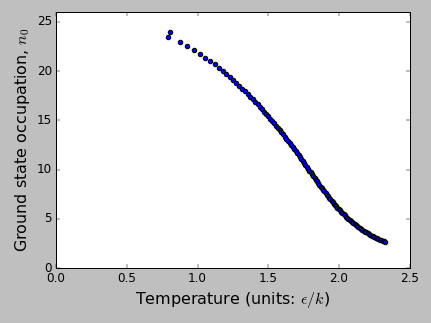

In [15]:
plt.figure()
plt.scatter(t_B,pop0_B[1:len(pop0_B)-1])
#plt.scatter(t_D,pop0_D[1:len(pop0_D)-1], color='red')
plt.xlim(0,2.5)
plt.ylim(0,26);
plt.xlabel('Temperature (units: $\epsilon/k$)')
plt.ylabel('Ground state occupation, $n_0$');
#plt.scatter(x,y)

#### Version information
`version_information` is from J.R. Johansson (`jrjohansson at gmail.com`); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

In [2]:
%load_ext version_information

In [3]:
version_information numpy, scipy, matplotlib, sympy

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 4.9.0 9 amd64 x86_64 with debian 9.13
numpy 1.18.5
scipy 1.5.0
matplotlib 3.2.2
sympy 1.6.1
Sat Dec 05 12:12:52 2020 EST